# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from meteostat import Point, Daily
pd.set_option('display.max_columns', None)

In [2]:
data_raw = pd.read_csv('C://Users//ryana//Downloads//constructiondata//US_Constructions_Dec21.csv')

In [3]:
data = data_raw.copy()
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,C-1,4,2019-04-05 16:00:00.000000000,2020-09-29 11:53:57.000000000,32.838360,-93.152378,32.850740,-93.164388,1.103497,Construction on LA-534 WB near EDMONDS LOOP Ro...,4200.0,Highway 534,R,Haynesville,Claiborne,LA,71038-7130,US,US/Central,KMNE,2019-04-05 15:55:00,75.0,75.0,58.0,29.72,10.0,S,3.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,C-2,2,2021-11-12 07:59:00.000000000,2021-11-12 08:22:30.000000000,30.221331,-92.008625,30.216642,-92.003809,0.433173,Slow traffic on US-90 E from US-167/Louisiana ...,1098.0,SW Evangeline Trwy,R,Lafayette,Lafayette,LA,70501-8244,US,US/Central,KLFT,2021-11-12 07:59:00,55.0,55.0,100.0,30.09,3.0,CALM,0.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,C-3,2,2021-10-12 07:17:30.000000000,2021-10-12 09:18:55.000000000,39.653153,-104.910224,39.653120,-104.913838,0.192266,Slow traffic on CO-30 from S Tamarac Dr (E Ham...,6779.0,E Hampden Ave,R,Denver,Denver,CO,80224-3007,US,US/Mountain,KBKF,2021-10-12 06:58:00,37.0,33.0,82.0,24.09,10.0,WSW,5.0,0.0,Partly Cloudy,False,False,True,False,False,False,False,False,True,False,False,False,False,Day,Day,Day,Day
3,C-4,4,2021-02-10 02:46:10.000000000,2021-02-17 23:59:00.000000000,33.961506,-118.029339,33.961919,-118.029082,0.032112,Closed road from Whittier to College Ave due t...,13585.0,Whittier Blvd,L,Whittier,Los Angeles,CA,90605-1935,US,US/Pacific,KFUL,2021-02-10 02:53:00,54.0,54.0,83.0,29.92,9.0,CALM,0.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
4,C-5,2,2020-09-24 15:58:00.000000000,2020-09-25 21:04:54.000000000,40.008734,-79.599696,40.022822,-79.595703,0.996057,Construction on US-119 NB near SAMPSON ST Allo...,1144.0,Schley St,R,Connellsville,Fayette,PA,15425-2945,US,US/Eastern,KLBE,2020-09-24 15:53:00,73.0,73.0,NaN,28.78,10.0,SSW,7.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


# Data Preparation

In [6]:
columbus = data[(data['State']=='OH') & (data['City']=='Columbus')].copy()
columbus

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
17,C-18,4,2018-10-08 04:29:57.000000000,2018-10-08 06:29:45.000000000,39.972050,-83.016360,39.973390,-83.012608,0.219182,At Goodale St/Neil Ave - Roadwork.,NaN,North Innerbelt W,R,Columbus,Franklin,OH,43215,US,US/Eastern,KCMH,2018-10-08 04:51:00,68.0,NaN,93.0,30.17,9.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1550,C-1580,2,2021-10-28 16:14:00.000000000,2021-10-28 16:58:30.000000000,39.897794,-82.929515,39.888800,-82.929090,0.621834,Stationary traffic from New World Dr to Aries ...,3298.0,Alum Creek Dr,L,Columbus,Franklin,OH,43207-3417,US,US/Eastern,KLCK,2021-10-28 15:55:00,64.0,64.0,63.0,28.78,10.0,SE,6.0,0.00,Cloudy,False,False,True,False,False,False,False,False,True,False,False,True,False,Day,Day,Day,Day
2319,C-2367,4,2017-02-08 23:07:40.000000000,2017-02-09 05:07:40.000000000,39.984080,-83.118950,39.947980,-83.120150,2.495082,Closed between I-70/Exit 8 and US-40/Broad St/...,NaN,Outerbelt S,R,Columbus,Franklin,OH,43228,US,US/Eastern,KTZR,2017-02-08 23:15:00,29.3,20.2,92.0,29.85,10.0,North,10.4,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2440,C-2490,2,2020-12-30 13:56:30.000000000,2020-12-31 03:10:44.000000000,39.951194,-82.998508,39.952659,-82.997879,0.106564,Slow traffic on US-23 S - US-23 N from E Hoste...,542.0,S High St,L,Columbus,Franklin,OH,43215-5605,US,US/Eastern,KCMH,2020-12-30 13:51:00,46.0,44.0,83.0,29.10,5.0,S,5.0,0.03,Light Rain,True,False,True,False,False,False,False,False,True,True,False,True,False,Day,Day,Day,Day
2554,C-2607,4,2020-06-29 02:25:29.000000000,2020-06-29 04:24:50.000000000,39.969090,-83.067600,39.966920,-83.061260,0.367683,At I-670 - Roadwork.,NaN,I-70 E,R,Columbus,Franklin,OH,43204,US,US/Eastern,KTZR,2020-06-29 02:15:00,73.0,73.0,90.0,28.90,10.0,WNW,3.0,0.00,Light Drizzle,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6169928,C-6292369,4,2016-07-13 13:02:32,2016-08-02 06:02:32,40.002371,-83.040188,40.003670,-83.040440,0.090738,Closed between Kenny Rd and Arthur E Adams Dr ...,1055.0,Carmack Rd,L,Columbus,Franklin,OH,43210-1001,US,US/Eastern,KOSU,2016-07-13 12:53:00,87.1,NaN,61.0,29.98,10.0,WSW,11.5,NaN,Scattered Clouds,False,False,True,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6169982,C-6292426,2,2021-03-05 07:24:00,2021-03-05 08:03:00,39.951953,-83.012441,39.955199,-82.984361,1.504061,Slow traffic on I-70 E - I-71 N - East Fwy E f...,NaN,I-70 E,R,Columbus,Franklin,OH,43215,US,US/Eastern,KCMH,2021-03-05 07:51:00,24.0,24.0,81.0,29.40,10.0,CALM,0.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6170066,C-6292512,3,2017-08-04 00:35:04,2017-08-04 06:35:04,39.974410,-83.095460,39.974983,-83.100130,0.250418,At Wilson Rd/Exit 94 - Construction work.,NaN,West Fwy W,R,Columbus,Franklin,OH,43204,US,US/Eastern,KTZR,2017-08-04 00:35:00,66.7,NaN,96.0,29.97,10.0,South,4.6,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night
6170229,C-6292676,4,2021-06-27 23:00:00,2021-08-16 06:00:00,40.117553,-82.973998,40.111576,-82.980440,0.535176,Construction on I-71 SB near I-2

In [7]:
def to_datetime(df):
    out = df.copy()
    out['Start_Time'] = pd.to_datetime(df['Start_Time'])
    return out

columbus = to_datetime(columbus)
columbus

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
17,C-18,4,2018-10-08 04:29:57,2018-10-08 06:29:45.000000000,39.972050,-83.016360,39.973390,-83.012608,0.219182,At Goodale St/Neil Ave - Roadwork.,NaN,North Innerbelt W,R,Columbus,Franklin,OH,43215,US,US/Eastern,KCMH,2018-10-08 04:51:00,68.0,NaN,93.0,30.17,9.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1550,C-1580,2,2021-10-28 16:14:00,2021-10-28 16:58:30.000000000,39.897794,-82.929515,39.888800,-82.929090,0.621834,Stationary traffic from New World Dr to Aries ...,3298.0,Alum Creek Dr,L,Columbus,Franklin,OH,43207-3417,US,US/Eastern,KLCK,2021-10-28 15:55:00,64.0,64.0,63.0,28.78,10.0,SE,6.0,0.00,Cloudy,False,False,True,False,False,False,False,False,True,False,False,True,False,Day,Day,Day,Day
2319,C-2367,4,2017-02-08 23:07:40,2017-02-09 05:07:40.000000000,39.984080,-83.118950,39.947980,-83.120150,2.495082,Closed between I-70/Exit 8 and US-40/Broad St/...,NaN,Outerbelt S,R,Columbus,Franklin,OH,43228,US,US/Eastern,KTZR,2017-02-08 23:15:00,29.3,20.2,92.0,29.85,10.0,North,10.4,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2440,C-2490,2,2020-12-30 13:56:30,2020-12-31 03:10:44.000000000,39.951194,-82.998508,39.952659,-82.997879,0.106564,Slow traffic on US-23 S - US-23 N from E Hoste...,542.0,S High St,L,Columbus,Franklin,OH,43215-5605,US,US/Eastern,KCMH,2020-12-30 13:51:00,46.0,44.0,83.0,29.10,5.0,S,5.0,0.03,Light Rain,True,False,True,False,False,False,False,False,True,True,False,True,False,Day,Day,Day,Day
2554,C-2607,4,2020-06-29 02:25:29,2020-06-29 04:24:50.000000000,39.969090,-83.067600,39.966920,-83.061260,0.367683,At I-670 - Roadwork.,NaN,I-70 E,R,Columbus,Franklin,OH,43204,US,US/Eastern,KTZR,2020-06-29 02:15:00,73.0,73.0,90.0,28.90,10.0,WNW,3.0,0.00,Light Drizzle,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6169928,C-6292369,4,2016-07-13 13:02:32,2016-08-02 06:02:32,40.002371,-83.040188,40.003670,-83.040440,0.090738,Closed between Kenny Rd and Arthur E Adams Dr ...,1055.0,Carmack Rd,L,Columbus,Franklin,OH,43210-1001,US,US/Eastern,KOSU,2016-07-13 12:53:00,87.1,NaN,61.0,29.98,10.0,WSW,11.5,NaN,Scattered Clouds,False,False,True,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6169982,C-6292426,2,2021-03-05 07:24:00,2021-03-05 08:03:00,39.951953,-83.012441,39.955199,-82.984361,1.504061,Slow traffic on I-70 E - I-71 N - East Fwy E f...,NaN,I-70 E,R,Columbus,Franklin,OH,43215,US,US/Eastern,KCMH,2021-03-05 07:51:00,24.0,24.0,81.0,29.40,10.0,CALM,0.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6170066,C-6292512,3,2017-08-04 00:35:04,2017-08-04 06:35:04,39.974410,-83.095460,39.974983,-83.100130,0.250418,At Wilson Rd/Exit 94 - Construction work.,NaN,West Fwy W,R,Columbus,Franklin,OH,43204,US,US/Eastern,KTZR,2017-08-04 00:35:00,66.7,NaN,96.0,29.97,10.0,South,4.6,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night
6170229,C-6292676,4,2021-06-27 23:00:00,2021-08-16 06:00:00,40.117553,-82.973998,40.111576,-82.980440,0.535176,Construction on I-71 SB near I-270 Use alterna...,NaN,I-71 S,R,Columbus,Franklin,O

In [8]:
def bin_places(df):
    out = df.copy()
    out['Start_Lng'] = np.trunc(df['Start_Lng']*25)/25
    out['Start_Lat'] = np.trunc(df['Start_Lat']*25)/25
    return out

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

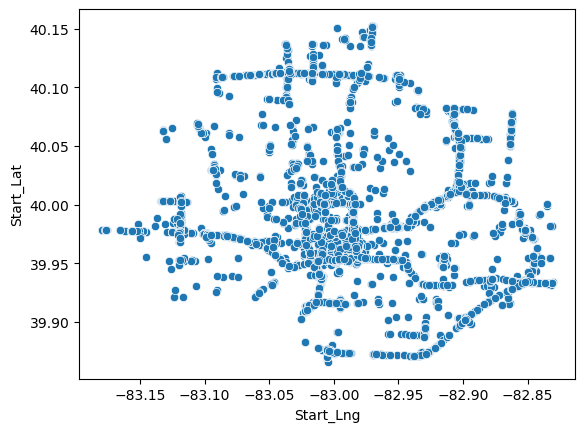

In [9]:
#Points before binning
sns.scatterplot(data=columbus, x='Start_Lng', y='Start_Lat')

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

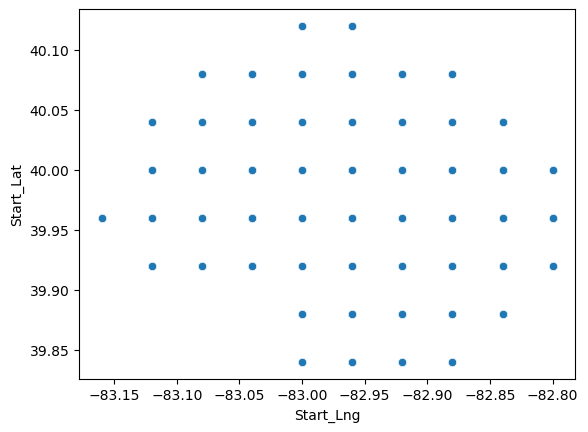

In [10]:
columbus = bin_places(columbus)
sns.scatterplot(data=columbus, x='Start_Lng', y='Start_Lat')

In [11]:
def group_closures(df):
    return df.groupby(['Start_Lat', 'Start_Lng', pd.Grouper(key='Start_Time', axis=0, freq='15D', origin='2016-01-01')]).aggregate(
    {'ID':'count'})

In [12]:
#Change dates on first two rows so that date bins will line up correctly (first closure reported in columbus was 1-12)
columbus = columbus.reset_index(drop=True)
columbus.loc[0,'Start_Time'] = pd.Timestamp('2016-01-01 12:29:57')
columbus.loc[1,'Start_Time'] = pd.Timestamp('2016-01-16 12:29:57')

In [13]:
columbus = group_closures(columbus)
columbus

ID
Start_Lat Start_Lng Start_Time    
39.84     -83.00    2016-03-01   1
                    2016-04-15   1
                    2016-07-29   1
                    2017-03-26   2
                    2017-08-23   1
...                             ..
40.12     -82.96    2021-07-03   2
                    2021-07-18   6
                    2021-08-02   2
                    2021-08-17   1
                    2021-10-31   2

[2087 rows x 1 columns]

In [14]:
def fill_times(df):
    # There are 147 times for each place - 146 after dropping the 12/30 period (since it's only two days long)
    out = df.unstack().fillna(0).stack().reset_index()
    return out[out['Start_Time']!='2021-12-30']

In [15]:
columbus.unstack()

ID                                              \
Start_Time          2016-01-01 2016-01-16 2016-01-31 2016-02-15 2016-03-01   
Start_Lat Start_Lng                                                          
39.84     -83.00           NaN        NaN        NaN        NaN        1.0   
          -82.96           NaN        NaN        NaN        NaN        NaN   
          -82.92           NaN        NaN        NaN        1.0        NaN   
          -82.88           NaN        NaN        NaN        NaN        NaN   
39.88     -83.00           NaN        NaN        NaN        NaN        NaN   
          -82.96           NaN        NaN        2.0        4.0        NaN   
          -82.92           NaN        1.0        NaN        NaN        NaN   
          -82.88           NaN        NaN        NaN        NaN        3.0   
          -82.84           NaN        NaN        NaN        NaN        NaN   
39.92     -83.12           NaN        NaN        NaN        NaN        NaN   
          -83.08           NaN        NaN        NaN        NaN        NaN   
          -83.04           NaN        NaN        NaN        NaN        NaN   
          -83.00           NaN        NaN        NaN        NaN        2.0   
          -82.96           NaN        NaN        1.0        1.0        1.0   
          -82.92           NaN        NaN        1.0        NaN        1.0   
          -82.88           NaN        NaN        NaN        NaN        NaN   
          -82.84           NaN        NaN        1.0        NaN        NaN   
          -82.80           NaN        NaN        NaN        NaN        NaN   
39.96     -83.16           NaN        NaN        NaN        NaN        NaN   
          -83.12           NaN        NaN        1.0        NaN        NaN   
          -83.08           NaN        NaN        NaN        2.0        1.0   
          -83.04           NaN        NaN        NaN        NaN        NaN   
          -83.00           1.0        NaN        2.0        NaN        1.0   
          -82.96           NaN        NaN        1.0        1.0        1.0   
          -82.92           1.0        NaN        3.0        NaN        NaN   
          -82.88           NaN        NaN        NaN        NaN        NaN   
          -82.84           NaN        NaN        NaN        NaN        NaN   
          -82.80           NaN        NaN        NaN        NaN        NaN   
40.00     -83.12           NaN        NaN        NaN        NaN        NaN   
          -83.08           NaN        NaN        NaN        NaN        1.0   
          -83.04           NaN        NaN        NaN        1.0        NaN   
          -83.00           NaN        NaN        NaN        NaN        1.0   
          -82.96           NaN        NaN        NaN        1.0        2.0   
          -82.92           NaN        NaN        NaN        NaN        NaN   
          -82.88           NaN        NaN        NaN        NaN        NaN   
          -82.84           NaN        NaN        2.0        1.0       92.0   
          -82.80           NaN        NaN        NaN        NaN        NaN   
40.04     -83.12           NaN        NaN        NaN        NaN        NaN   
          -83.08           NaN        NaN        NaN        NaN        NaN   
          -83.04           NaN        NaN        NaN        NaN        NaN   
          -83.00           NaN        NaN        NaN        NaN        NaN   
          -82.96           NaN        NaN        NaN        NaN        NaN   
          -82.92           NaN        NaN        NaN        NaN        NaN   
          -82.88           NaN        NaN        NaN        NaN        NaN   
          -82.84           NaN        NaN        NaN        NaN        NaN   
40.08     -83.08           NaN        NaN        NaN        NaN        6.0   
          -83.04           NaN        NaN        NaN        NaN        NaN   
          -83.00           NaN        NaN        NaN        4.0        3.0   
          -82.96           NaN        NaN        N

In [16]:
columbus = fill_times(columbus)
columbus

,Start_Lat,Start_Lng,Start_Time,ID
0,39.84,-83.00,2016-01-01,0.0
1,39.84,-83.00,2016-01-16,0.0
2,39.84,-83.00,2016-01-31,0.0
3,39.84,-83.00,2016-02-15,0.0
4,39.84,-83.00,2016-03-01,1.0
...,...,...,...,...
7785,40.12,-82.96,2021-10-16,0.0
7786,40.12,-82.96,2021-10-31,2.0
7787,40.12,-82.96,2021-11-15,0.0
7788,40.12,-82.96,2021-11-30,0.0


In [17]:
# Takes lng and lat and returns a dataframe with average temp and precipitation for that place with a row for each of the 146 times
def get_weather(lat, lng):
    error_index = Daily(Point(49.00,98), datetime.datetime(2016, 1, 1), datetime.datetime(2021, 12, 31)).fetch().reset_index().groupby(pd.Grouper(key='time', axis=0, freq='15D')).aggregate({'tavg':'mean', 'prcp':'mean'}).iloc[:146,:].index    
    #fetch weather data for each time period for the specified point, dropping the last row (date 12-30)
    weather_data = Daily(Point(lat, lng), datetime.datetime(2016, 1, 1), datetime.datetime(2021, 12, 31)).fetch()
    try:
        out = round(weather_data.reset_index().groupby(pd.Grouper(key='time', axis=0, freq='15D')).aggregate({'tavg':'mean', 'prcp':'mean'}).iloc[:146,:], 2)
    except:
        out = pd.DataFrame(np.nan, index= error_index, columns = ['tavg', 'prcp'])
    return out

def add_weather(df):
    out = pd.DataFrame(columns=['Start_Lat', 'Start_Lng', 'Start_Time', 'ID', 'tavg',
       'prcp'])
    for lat in df['Start_Lat'].unique(): #loop through unique lat values
        for lng in df[df['Start_Lat']==lat]['Start_Lng'].unique(): #loop through unique lat/lng combos
            places = df.loc[(df['Start_Lat']==lat) & (df['Start_Lng']==lng)]
            weather_df = pd.merge(places, get_weather(lat, lng), left_on='Start_Time', right_on='time')
            out = pd.concat([out, weather_df])
    return out

In [18]:
%time columbus = add_weather(columbus)

Wall time: 6.15 s


In [19]:
columbus

,Start_Lat,Start_Lng,Start_Time,ID,tavg,prcp
0,39.84,-83.00,2016-01-01,0.0,-1.55,0.00
1,39.84,-83.00,2016-01-16,0.0,-3.61,0.00
2,39.84,-83.00,2016-01-31,0.0,-1.20,2.54
3,39.84,-83.00,2016-02-15,0.0,4.10,0.00
4,39.84,-83.00,2016-03-01,1.0,7.81,1.45
...,...,...,...,...,...,...
141,40.12,-82.96,2021-10-16,0.0,12.98,6.50
142,40.12,-82.96,2021-10-31,2.0,7.69,1.54
143,40.12,-82.96,2021-11-15,0.0,4.23,1.41
144,40.12,-82.96,2021-11-30,0.0,4.97,2.44


In [20]:
columbus.isna().sum()

Start_Lat     0
Start_Lng     0
Start_Time    0
ID            0
tavg          0
prcp          0
dtype: int64

In [21]:
#input: a df of aggregated info for time/places. 
# Create input df by groupby object (first long/lat, then time bin) and aggregating.  
def create_history(df):
    col_names = ['Lat', 'Lng', 'Date', 'Close_Count', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
    out = []
    dates = df['Start_Time'].unique()
    for lat in df['Start_Lat'].unique(): #loop through unique lat values
        for lng in df[df['Start_Lat']==lat]['Start_Lng'].unique(): #loop through each unique long for that lat value (to find long/lat pairs)
            places = df.loc[(df['Start_Lat']==lat) & (df['Start_Lng']==lng)].sort_values('Start_Time').reset_index()
            for index, row in places.iterrows(): #iterate through dates for that lat/long pair
                if row['Start_Time'] > pd.Timestamp('2016-05-29'): #eliminate rows without 10 preceding dates
                    #create df row to concat onto result df
                    add = [lat, lng, row['Start_Time'], row['ID'], 
                                        places.iloc[index-1]['ID'], places.iloc[index-2]['ID'], places.iloc[index-3]['ID'], 
                                        places.iloc[index-4]['ID'], places.iloc[index-5]['ID'], places.iloc[index-6]['ID'],
                                        places.iloc[index-7]['ID'], places.iloc[index-8]['ID'],places.iloc[index-9]['ID'],
                                        places.iloc[index-10]['ID'],
                                        places.iloc[index-1]['tavg'], places.iloc[index-2]['tavg'], places.iloc[index-3]['tavg'], 
                                        places.iloc[index-4]['tavg'], places.iloc[index-5]['tavg'], places.iloc[index-6]['tavg'],
                                        places.iloc[index-7]['tavg'], places.iloc[index-8]['tavg'], places.iloc[index-9]['tavg'],
                                        places.iloc[index-10]['tavg'],
                                        places.iloc[index-1]['prcp'], places.iloc[index-2]['prcp'], places.iloc[index-3]['prcp'], 
                                        places.iloc[index-4]['prcp'], places.iloc[index-5]['prcp'], places.iloc[index-6]['prcp'],
                                        places.iloc[index-7]['prcp'], places.iloc[index-8]['prcp'], places.iloc[index-9]['prcp'],
                                        places.iloc[index-10]['prcp']]
                    out.append(add)
    return pd.DataFrame(out, columns=col_names)

In [22]:
#make history
%time columbus = create_history(columbus)
columbus

Wall time: 29.8 s


,Lat,Lng,Date,Close_Count,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,39.84,-83.00,2016-05-30,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.65,13.73,15.33,6.43,8.84,7.81,4.10,-1.20,-3.61,-1.55,0.36,0.38,0.09,0.93,0.00,1.45,0.00,2.54,0.00,0.00
1,39.84,-83.00,2016-06-14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,21.83,16.65,13.73,15.33,6.43,8.84,7.81,4.10,-1.20,-3.61,0.18,0.36,0.38,0.09,0.93,0.00,1.45,0.00,2.54,0.00
2,39.84,-83.00,2016-06-29,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.71,21.83,16.65,13.73,15.33,6.43,8.84,7.81,4.10,-1.20,1.38,0.18,0.36,0.38,0.09,0.93,0.00,1.45,0.00,2.54
3,39.84,-83.00,2016-07-14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.37,23.71,21.83,16.65,13.73,15.33,6.43,8.84,7.81,4.10,0.09,1.38,0.18,0.36,0.38,0.09,0.93,0.00,1.45,0.00
4,39.84,-83.00,2016-07-29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,24.91,22.37,23.71,21.83,16.65,13.73,15.33,6.43,8.84,7.81,0.21,0.09,1.38,0.18,0.36,0.38,0.09,0.93,0.00,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7203,40.12,-82.96,2021-10-16,0.0,0.0,0.0,0.0,1.0,2.0,6.0,2.0,4.0,8.0,15.0,21.02,19.80,21.94,25.69,23.90,23.92,24.59,24.23,23.35,20.53,1.63,5.07,1.91,1.93,5.71,1.75,7.19,5.97,3.29,1.98
7204,40.12,-82.96,2021-10-31,2.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,2.0,4.0,8.0,12.98,21.02,19.80,21.94,25.69,23.90,23.92,24.59,24.23,23.35,6.50,1.63,5.07,1.91,1.93,5.71,1.75,7.19,5.97,3.29
7205,40.12,-82.96,2021-11-15,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,2.0,4.0,7.69,12.98,21.02,19.80,21.94,25.69,23.90,23.92,24.59,24.23,1.54,6.50,1.63,5.07,1.91,1.93,5.71,1.75,7.19,5.97
7206,40.12,-82.96,2021-11-30,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,2.0,4.23,7.69,12.98,21.02,19.80,21.94,25.69,23.90,23.92,24.59,1.41,1.54,6.50,1.63,5.07,1.91,1.93,5.71,1.75,7.19


# Old Versions

## Weather API

Getting weather data through the Open-Metro weather API was successful for a small test set but could not scale for the full dataset; it would have taken hundreds of hours to fetch the data.

In [23]:
import json
import requests

In [24]:
#takes a row from the summary table and returns the average temp and precipitation sum for that 15 day period as a 2x1 array
def get_one_weather(row):
    date = row['Start_Time']
    lat = row['Start_Lat']
    lng = row['Start_Lng']
    start_date = date.strftime("%Y-%m-%d")
    end_date = (date + datetime.timedelta(days=15)).strftime("%Y-%m-%d")
    url = 'https://archive-api.open-meteo.com/v1/archive?latitude=' + str(lat) +'&longitude=' + str(lng) + '&start_date=' + start_date + '&end_date=' + end_date +'&daily=temperature_2m_mean,precipitation_sum&timezone=auto'
    response = requests.get(url)
    text = response.text
    json_data = json.loads(text)
    return [round(np.mean(json_data['daily']['temperature_2m_mean']), 2), round(np.mean(json_data['daily']['precipitation_sum']), 2)]
get_one_weather(c_groups.iloc[0])
c_groups.iloc[0]

NameError: name 'c_groups' is not defined

In [ ]:
# Takes a dataframe and returns dataframe with weather info columns
def get_weather(df):
    weather_df = pd.DataFrame(columns=['Avg_Temp', 'Avg_Prec'])
    for index, row in df.iterrows():
        date = row['Start_Time']
        lat = row['Start_Lat']
        lng = row['Start_Lng']
        start_date = date.strftime("%Y-%m-%d")
        end_date = (date + datetime.timedelta(days=15)).strftime("%Y-%m-%d")
        url = 'https://archive-api.open-meteo.com/v1/archive?latitude=' + str(lat) +'&longitude=' + str(lng) + '&start_date=' + start_date + '&end_date=' + end_date +'&daily=temperature_2m_mean,precipitation_sum&timezone=auto'
        response = requests.get(url)
        text = response.text
        json_data = json.loads(text)
        weather_df.loc[len(weather_df.index)] = [round(np.mean(json_data['daily']['temperature_2m_mean']), 2), round(np.mean(json_data['daily']['precipitation_sum']), 2)]
    return pd.concat([df, weather_df], axis=1)
c_groups_weather = get_weather(c_groups)
c_groups_weather

### Citation & Acknowledgement
ERA5: Generated using Copernicus Climate Change Service information 2022.

ERA5: Hersbach, H., Bell, B., Berrisford, P., Biavati, G., Horányi, A., Muñoz Sabater, J., Nicolas, J., 
Peubey, C., Radu, R., Rozum, I., Schepers, D., Simmons, A., Soci, C., Dee, D., Thépaut, J-N. (2018): 
ERA5 hourly data on single levels from 1959 to present. 
Copernicus Climate Change Service (C3S) Climate Data Store (CDS). (Updated daily), 10.24381/cds.adbb2d47

ERA5-Land: Muñoz Sabater, J., (2019): ERA5-Land hourly data from 1981 to present. (Accessed on daily), 10.24381/cds.e2161bac

CERRA: Schimanke S., Ridal M., Le Moigne P., Berggren L., Undén P., Randriamampianina R., Andrea U., Bazile E., 
Bertelsen A., Brousseau P., Dahlgren P., Edvinsson L., El Said A., Glinton M., Hopsch S., Isaksson L., Mladek R., 
Olsson E., Verrelle A., Wang Z.Q., (accessed on 2022-12-31), doi: '10.24381/cds.622a565a'
  
All users of Open-Meteo data must provide a clear attribution to the Copernicus program as well as a reference to Open-Meteo.

## DataFrame-based Create History Method

In [ ]:
#discarded in favor of faster list-based version (29s vs 49s on columbus test set, 30 min vs almost 4 hr on big cities)
def create_history_old(df):
    col_names = ['Lat', 'Lng', 'Date', 'Close_Count', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
    out = pd.DataFrame(columns = col_names)
    dates = df['Start_Time'].unique()
    for lat in df['Start_Lat'].unique(): #loop through unique lat values
        for lng in df[df['Start_Lat']==lat]['Start_Lng'].unique(): #loop through each unique long for that lat value (to find long/lat pairs)
            places = df.loc[(df['Start_Lat']==lat) & (df['Start_Lng']==lng)]
            for index, row in places.iterrows(): #iterate through dates for that lat/long pair
                if row['Start_Time'] > pd.Timestamp('2016-05-29'): #eliminate rows without 10 preceding dates
                    #create df row to concat onto result df
                    add = pd.DataFrame([[lat, lng, row['Start_Time'], row['ID'], 
                                        df.iloc[index-1]['ID'], df.iloc[index-2]['ID'], df.iloc[index-3]['ID'], 
                                        df.iloc[index-4]['ID'], df.iloc[index-5]['ID'], df.iloc[index-6]['ID'],
                                        df.iloc[index-7]['ID'], df.iloc[index-8]['ID'],df.iloc[index-9]['ID'],
                                        df.iloc[index-10]['ID'],
                                        df.iloc[index-1]['tavg'], df.iloc[index-2]['tavg'], df.iloc[index-3]['tavg'], 
                                        df.iloc[index-4]['tavg'], df.iloc[index-5]['tavg'], df.iloc[index-6]['tavg'],
                                        df.iloc[index-7]['tavg'], df.iloc[index-8]['tavg'], df.iloc[index-9]['tavg'],
                                        df.iloc[index-10]['tavg'],
                                        df.iloc[index-1]['prcp'], df.iloc[index-2]['prcp'], df.iloc[index-3]['prcp'], 
                                        df.iloc[index-4]['prcp'], df.iloc[index-5]['prcp'], df.iloc[index-6]['prcp'],
                                        df.iloc[index-7]['prcp'], df.iloc[index-8]['prcp'], df.iloc[index-9]['prcp'],
                                        df.iloc[index-10]['prcp']]],
                                            columns = col_names)
                    
                    out = pd.concat([out, add])
    return out.reset_index(drop=True)